In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
from deepface import DeepFace

In [4]:
img = cv2.imread('happyboy.jpg')

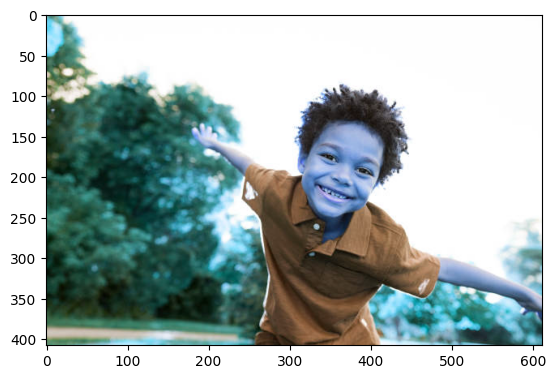

In [5]:
plt.imshow(img)

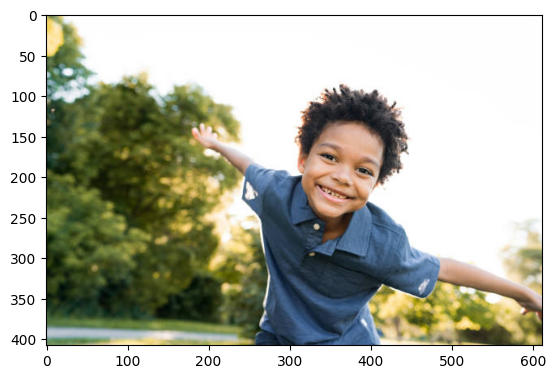

In [6]:
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))

In [7]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:17<00:00,  4.37s/it]   


In [8]:
predictions

[{'emotion': {'angry': 3.006521975823517e-08,
   'disgust': 2.0785968974680602e-11,
   'fear': 3.4316061103822904e-07,
   'happy': 99.98481273651123,
   'sad': 3.1511822840002424e-05,
   'surprise': 3.891728259097782e-09,
   'neutral': 0.01515520125394687},
  'dominant_emotion': 'happy',
  'region': {'x': 309,
   'y': 135,
   'w': 118,
   'h': 118,
   'left_eye': (391, 194),
   'right_eye': (350, 177)},
  'face_confidence': 0.96,
  'age': 25,
  'gender': {'Woman': 0.8785808458924294, 'Man': 99.12142157554626},
  'dominant_gender': 'Man',
  'race': {'asian': 8.91592726111412,
   'indian': 3.3779535442590714,
   'black': 64.96372818946838,
   'white': 0.8982978761196136,
   'middle eastern': 0.3755925456061959,
   'latino hispanic': 21.46850675344467},
  'dominant_race': 'black'}]

'dominant_emotion': 'happy',
 'dominant_gender': 'Man',
 

In [9]:
type(predictions)

list

In [10]:
predictions[0]['dominant_emotion']

'happy'

## We are trying to draw a rectangle across the face

In [11]:
# Haar Cascade Classifier

# scans an image and says, “this region looks like a face”.
# face recognition algo


In [12]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
for(x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

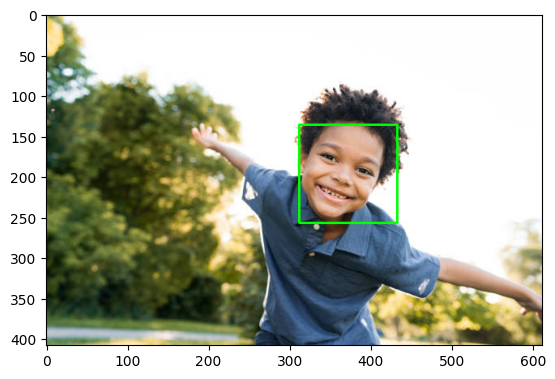

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,
           predictions[0]['dominant_emotion'],
           (0,50),
           font, 1,
           (0, 0, 255),
           2,
           cv2.LINE_4) ;

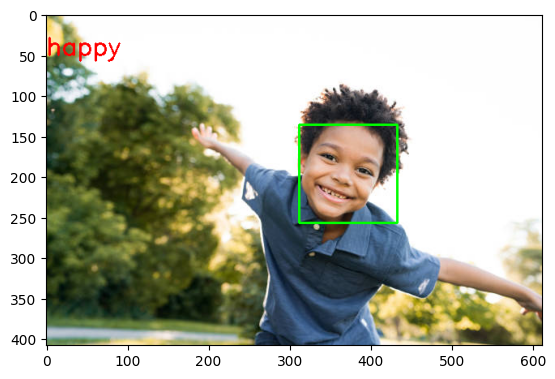

In [16]:
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))

In [29]:
img1 = plt.imread('sadwomen.jpg')

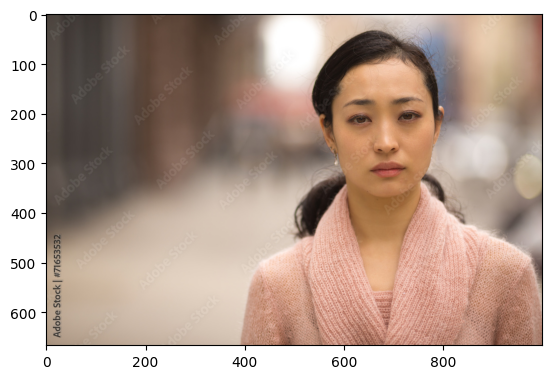

In [30]:
plt.imshow(img1)

In [31]:
predictions_1 = DeepFace.analyze(img1)

Action: race: 100%|██████████| 4/4 [00:08<00:00,  2.06s/it]   


In [32]:
predictions_1

[{'emotion': {'angry': 2.591262571513653,
   'disgust': 0.0004567945325106848,
   'fear': 6.8671755492687225,
   'happy': 0.03175040183123201,
   'sad': 19.18659210205078,
   'surprise': 0.00020981103716621874,
   'neutral': 71.32255434989929},
  'dominant_emotion': 'neutral',
  'region': {'x': 549,
   'y': 101,
   'w': 273,
   'h': 273,
   'left_eye': (725, 207),
   'right_eye': (634, 213)},
  'face_confidence': 0.88,
  'age': 29,
  'gender': {'Woman': 99.35571551322937, 'Man': 0.6442905403673649},
  'dominant_gender': 'Woman',
  'race': {'asian': 99.94657635688782,
   'indian': 0.007691085920669138,
   'black': 3.6823866178536946e-07,
   'white': 0.0043282165279379115,
   'middle eastern': 6.170814081940534e-07,
   'latino hispanic': 0.0414045003708452},
  'dominant_race': 'asian'}]

## Real tine video demo for face Emotion Recognition

In [36]:
cam = cv2.VideoCapture(1)

if not cam.isOpened():
    cam = cv2.VideoCapture(0)
if not cam.isOpened():
    raise IOError("Cannot open webcam")

In [40]:
while True:
    ret, frame = cap.read() ## read one frame from a video
    if not ret:
        break

    try:
        result = DeepFace.analyze(frame, actions = ['emotion'])
    except Exception as e:
        print("DeepFace error:", e)
        continue

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray , 1.1, 4)

    #drawing rectangle 
    for(x, t, w, h) in faces :
        cv2.rectangle(frame, (x,y),(x+w, y+h),(0,255,0),2)

    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(frame,
               result[0]['dominant_emotion'],
               (50,50),
               font,3,
               (0,0, 255), ## BGR
               2,
               cv2.LINE_4)
    cv2.imshow('demo_video', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):q
        break

cam.release()
cv2.destroyAllWindows()

DeepFace error: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
DeepFace error: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
DeepFace error: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
DeepFace error: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
DeepFace error: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
DeepFace error: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
DeepFace error: Face could not be detected in 